# 问题2：原材料订购与转运方案优化



## 问题分析

问题2要求解决两个核心问题：
1. 确定企业至少需要选择多少家供应商来满足生产需求
2. 制定未来24周最经济的原材料订购方案和损耗最少的转运方案

## 基础数据回顾

基于第一问的分析，我们已经获得：
- 402家供应商的供货特征量化分析
- 50家最重要供应商的排名
- 各供应商的供货稳定性、可靠性评估
- 转运商的损耗率分析

## 约束条件梳理

### 生产需求约束
- 企业每周产能：2.82万立方米
- 原材料消耗比例：
  - A类：0.6立方米/立方米产品
  - B类：0.66立方米/立方米产品  
  - C类：0.72立方米/立方米产品
- 库存要求：不少于满足两周生产需求的库存量

### 供应商约束
- 供应商实际供货量可能偏离订货量
- 需要基于历史数据预测供货稳定性
- 每家供应商有其供应能力上限

### 转运约束
- 每家转运商运输能力：6000立方米/周
- 转运过程中存在损耗（损耗率varies by转运商）
- 一家供应商每周的原材料尽量由一家转运商运输

### 成本约束
- A类原材料采购单价比C类高20%
- B类原材料采购单价比C类高10%
- 运输和储存的单位费用相同

## 解决思路

### 第一阶段：最少供应商数量确定

#### 方法1：基于需求量的理论计算
1. **计算每周最大原材料需求**
   - 按最高效率（A类原材料）：2.82万 × 0.6 = 1.692万立方米/周
   - 按最低效率（C类原材料）：2.82万 × 0.72 = 2.03万立方米/周

2. **考虑安全库存需求**
   - 两周生产需求作为安全库存
   - 总需求 = 周需求 + 安全库存需求

3. **基于TOP50供应商的供应能力**
   - 从第一问结果中提取TOP50供应商的平均供货能力
   - 按供应能力从高到低排序，累计计算直到满足总需求

#### 方法2：基于历史数据的蒙特卡洛模拟
1. **建立供应商供货概率模型**
   - 基于历史数据建立每个供应商的供货量分布
   - 考虑供货的不确定性和波动性

2. **多次模拟验证**
   - 随机选择不同数量的供应商组合
   - 模拟24周的供货情况
   - 计算满足需求的概率，确定最少供应商数量

### 第二阶段：最经济订购方案制定

#### 目标函数设计
$$\text{最小化总成本} = \text{采购成本} + \text{库存成本} + \text{缺货惩罚成本}$$

其中：
- 采购成本 = Σ(订货量 × 单价 × 材料类型系数)
- 库存成本 = Σ(库存量 × 单位库存费用)
- 缺货惩罚成本 = Σ(缺货量 × 单位缺货惩罚)

#### 决策变量
- $x_{i,t}$：第t周向供应商i的订货量
- $I_{t}$：第t周末的库存量
- $S_{t}$：第t周的缺货量

#### 约束条件
1. **需求满足约束**：$\text{库存} + \text{本周接收量} - \text{本周消耗} \geq 0$

2. **库存平衡约束**：$I_t = I_{t-1} + \text{接收量}_t - \text{需求}_t$

3. **最小库存约束**：$I_t \geq 2 \times \text{周需求}$

4. **供应商产能约束**：$x_{i,t} \leq \text{供应商i的最大供应能力}$

5. **非负约束**：$x_{i,t} \geq 0$

### 第三阶段：损耗最少转运方案

#### 目标函数
$$\text{最小化总损耗} = \sum_{i,j,t} (\text{供货量}_{i,t} \times \text{损耗率}_{j,t} \times y_{i,j,t})$$

#### 决策变量
- $y_{i,j,t}$：第t周供应商i是否由转运商j运输（0-1变量）

#### 约束条件
1. **转运商选择约束**：$\sum_j y_{i,j,t} \leq 1$ （每个供应商每周最多选择一个转运商）

2. **转运能力约束**：$\sum_i (\text{供货量}_{i,t} \times y_{i,j,t}) \leq 6000$ （每个转运商的周运输能力）

3. **逻辑约束**：只有当供应商i在第t周有供货时，才能选择转运商

## 求解策略

### 整体求解框架
1. **两阶段优化方法**
   - 第一阶段：固定供应商选择，优化订购量
   - 第二阶段：基于订购方案，优化转运分配

2. **启发式算法**
   - 贪心算法：优先选择性价比高的供应商和转运商
   - 遗传算法：用于供应商组合优化
   - 动态规划：用于时间序列的订购量优化

### 模型验证
1. **历史数据回测**：用前期数据验证模型的有效性
2. **敏感性分析**：分析关键参数变化对结果的影响
3. **鲁棒性测试**：测试方案在不确定环境下的表现

## 预期分析内容

### 订购方案分析
1. **供应商选择结果**：最终选择的供应商数量和名单
2. **订购量分布**：各周、各供应商的具体订购量
3. **成本分析**：总成本构成和每周成本变化
4. **风险评估**：供货风险和库存风险分析

### 转运方案分析
1. **转运商利用率**：各转运商的使用频率和运输量
2. **损耗分析**：总损耗量和损耗率统计
3. **运输效率**：运输能力利用率分析

### 实施效果评估
1. **需求满足率**：各周需求满足程度
2. **库存水平**：库存量变化趋势和安全性
3. **经济效益**：成本节约和效率提升
4. **风险控制**：供应风险的有效控制程度

## 技术实施方案

### 数据预处理
1. **利用第一问的分析结果**
   - 导入供应商可靠性评估数据
   - 导入转运商损耗率分析数据
   - 导入TOP50重要供应商名单

2. **建立基础数据结构**
   - 供应商基本信息（名称、类型、历史供货数据）
   - 转运商基本信息（名称、历史损耗率数据）
   - 生产需求参数（产能、原材料消耗比例、成本系数）

### 核心算法设计

#### 算法1：最少供应商数量确定
```
输入：TOP50供应商数据、生产需求、安全库存要求
输出：最少供应商数量N

步骤：
1. 按供应商重要性排序（来自第一问结果）
2. 计算累计供应能力
3. 考虑供货不确定性，添加安全边际
4. 返回满足需求的最少供应商数量
```

#### 算法2：订购方案优化
```
输入：选定供应商集合、24周需求预测、成本参数
输出：最优订购计划矩阵

方法：多目标线性规划
- 目标1：最小化总成本
- 目标2：最大化供应稳定性
- 约束：需求满足、库存要求、供应能力限制
```

#### 算法3：转运方案优化
```
输入：订购方案、转运商损耗数据、运输能力
输出：最优转运分配方案

方法：匈牙利算法 + 启发式优化
- 构建成本矩阵（基于损耗率）
- 考虑运输能力约束
- 优化供应商-转运商匹配
```

### 关键技术点

#### 1. 不确定性处理
- **供货量预测**：基于历史数据的时间序列分析
- **需求波动**：考虑生产计划的不确定性
- **应急预案**：设计供应商备选方案

#### 2. 多目标优化
- **成本与风险平衡**：帕累托前沿分析
- **权重设定**：基于企业决策偏好
- **方案比较**：多准则决策分析（MCDM）

#### 3. 滚动优化策略
- **周期性重新规划**：每4周更新一次方案
- **反馈机制**：根据实际执行情况调整参数
- **学习能力**：历史数据不断更新模型参数

## 代码实现框架

### 主要模块划分
1. **数据加载模块**：`data_loader.py`
2. **需求预测模块**：`demand_forecast.py`  
3. **供应商选择模块**：`supplier_selection.py`
4. **订购优化模块**：`order_optimization.py`
5. **转运优化模块**：`transport_optimization.py`
6. **结果分析模块**：`result_analysis.py`
7. **可视化模块**：`visualization.py`

### 优化求解工具
- **线性规划**：PuLP库或Gurobi
- **整数规划**：用于0-1决策变量
- **启发式算法**：遗传算法（DEAP库）
- **统计分析**：SciPy、Statsmodels

### 输出结果格式
1. **订购方案表**：供应商 × 周次 矩阵
2. **转运方案表**：供应商-转运商分配表
3. **成本分析报告**：各项成本明细和趋势
4. **风险评估报告**：供应风险和应对措施
5. **可视化图表**：成本趋势、库存变化、供应商分布等

## 评估指标体系

### 经济性指标
- **总成本**：采购成本 + 运输成本 + 库存成本
- **单位成本**：每立方米产品的原材料成本
- **成本波动性**：成本标准差和变异系数

### 稳定性指标  
- **需求满足率**：实际满足需求/计划需求
- **库存充足率**：满足安全库存要求的周数比例
- **供应商集中度**：基尼系数或HHI指数

### 效率性指标
- **损耗率**：总损耗量/总供货量
- **运输利用率**：实际运输量/运输能力
- **库存周转率**：年消耗量/平均库存量

### 风险性指标
- **供应中断风险**：供应商失效概率
- **价格波动风险**：成本变异系数
- **需求冲击风险**：极端情况下的应对能力

# 代码实现

## **1.** 导入库和数据

In [19]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', '黑体', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


print("库导入完成，开始加载第一问的分析结果...")

库导入完成，开始加载第一问的分析结果...


In [20]:
# 加载第一问的分析结果
def load_problem1_results():
    """加载第一问的分析结果 - 基于新的数据结构"""
    try:
        # 1. 加载供应商可靠性年度加权排名（主要结果文件）
        supplier_ranking = pd.read_excel('DataFrames/供应商可靠性年度加权排名.xlsx')
        print(f"✓ 供应商排名数据加载完成: {len(supplier_ranking)} 条记录")
        
        # 2. 加载供应商基本特征分析
        supplier_features = pd.read_excel('DataFrames/供应商基本特征分析.xlsx')
        print(f"✓ 供应商基本特征数据加载完成: {len(supplier_features)} 条记录")
        
        # 3. 加载供应商可靠性综合评估
        reliability_assessment = pd.read_excel('DataFrames/供应商可靠性综合评估.xlsx')
        print(f"✓ 供应商可靠性评估数据加载完成: {len(reliability_assessment)} 条记录")
        
        # 4. 加载供应商供货率分析
        supply_rate_analysis = pd.read_excel('DataFrames/供应商供货率分析.xlsx')
        print(f"✓ 供应商供货率分析数据加载完成: {len(supply_rate_analysis)} 条记录")
        
        # 5. 加载原始供应商数据（用于详细分析）
        supplier_order = pd.read_excel('C/附件1 近5年402家供应商的相关数据.xlsx', sheet_name='企业的订货量（m³）')
        supplier_supply = pd.read_excel('C/附件1 近5年402家供应商的相关数据.xlsx', sheet_name='供应商的供货量（m³）')
        print(f"✓ 原始供应商数据加载完成")
        
        # 6. 加载转运商数据
        transporter_data = pd.read_excel('C/附件2 近5年8家转运商的相关数据.xlsx')
        print(f"✓ 转运商数据加载完成: {len(transporter_data)} 条记录")
        
        print("=" * 50)
        print("数据加载总览:")
        print(f"  供应商排名文件: {supplier_ranking.shape}")
        print(f"  供应商特征文件: {supplier_features.shape}")
        print(f"  可靠性评估文件: {reliability_assessment.shape}")
        print(f"  供货率分析文件: {supply_rate_analysis.shape}")
        print(f"  原始订货数据: {supplier_order.shape}")
        print(f"  原始供货数据: {supplier_supply.shape}")
        print(f"  转运商数据: {transporter_data.shape}")
        
        return {
            'supplier_ranking': supplier_ranking,
            'supplier_features': supplier_features,
            'reliability_assessment': reliability_assessment,
            'supply_rate_analysis': supply_rate_analysis,
            'supplier_order': supplier_order,
            'supplier_supply': supplier_supply,
            'transporter_data': transporter_data
        }
    
    except Exception as e:
        print(f"数据加载出错: {e}")
        return None

# 设置生产需求参数
def set_production_parameters():
    """设置生产需求参数 - 调整为更合理的数值"""
    params = {
        'weekly_production': 28200,
        'material_ratios': {'A': 0.6, 'B': 0.66, 'C': 0.72},  # 每立方米产品需要的原材料
        'price_multipliers': {'A': 1.2, 'B': 1.1, 'C': 1.0},  # 相对C类的价格倍数
        'safety_stock_weeks': 2,  # 安全库存周数
        'planning_weeks': 24  # 规划周数
    }
    
    print("生产参数设置（调整后）:")
    print(f"  每周产能: {params['weekly_production']:,} 立方米")
    print(f"  安全库存要求: {params['safety_stock_weeks']} 周")
    print(f"  规划期长度: {params['planning_weeks']} 周")
    print(f"  材料消耗比例: A类{params['material_ratios']['A']}, B类{params['material_ratios']['B']}, C类{params['material_ratios']['C']}")
    
    return params

# 执行数据加载
print("开始加载第一问的分析结果...")
problem1_data = load_problem1_results()
production_params = set_production_parameters()

开始加载第一问的分析结果...
✓ 供应商排名数据加载完成: 50 条记录
✓ 供应商基本特征数据加载完成: 402 条记录
✓ 供应商可靠性评估数据加载完成: 402 条记录
✓ 供应商供货率分析数据加载完成: 402 条记录
✓ 原始供应商数据加载完成
✓ 转运商数据加载完成: 8 条记录
数据加载总览:
  供应商排名文件: (50, 19)
  供应商特征文件: (402, 10)
  可靠性评估文件: (402, 24)
  供货率分析文件: (402, 7)
  原始订货数据: (402, 242)
  原始供货数据: (402, 242)
  转运商数据: (8, 241)
生产参数设置（调整后）:
  每周产能: 28,200 立方米
  安全库存要求: 2 周
  规划期长度: 24 周
  材料消耗比例: A类0.6, B类0.66, C类0.72
✓ 原始供应商数据加载完成
✓ 转运商数据加载完成: 8 条记录
数据加载总览:
  供应商排名文件: (50, 19)
  供应商特征文件: (402, 10)
  可靠性评估文件: (402, 24)
  供货率分析文件: (402, 7)
  原始订货数据: (402, 242)
  原始供货数据: (402, 242)
  转运商数据: (8, 241)
生产参数设置（调整后）:
  每周产能: 28,200 立方米
  安全库存要求: 2 周
  规划期长度: 24 周
  材料消耗比例: A类0.6, B类0.66, C类0.72


In [21]:
# 读取原始附件1数据并转换为实际可制造产品量
def load_and_convert_supplier_data():
    """读取原始供应商数据，并将原材料供货量转换为可制造的产品量"""
    
    print("正在读取附件1原始数据...")
    
    # 读取供应商供货量数据
    supplier_supply = pd.read_excel('C/附件1 近5年402家供应商的相关数据.xlsx', 
                                   sheet_name='供应商的供货量（m³）')
    
    print(f"原始供货数据形状: {supplier_supply.shape}")
    print("前几行数据:")
    print(supplier_supply.head())
    print("\n数据列名:")
    print(supplier_supply.columns.tolist())
    
    # 检查数据结构
    print(f"\n数据类型分布:")
    for col in supplier_supply.columns:
        print(f"  {col}: {supplier_supply[col].dtype}")
    
    return supplier_supply

def convert_materials_to_product_capacity():
    """将原材料供货量转换为可制造的产品量"""
    
    # 先加载数据
    supplier_supply = load_and_convert_supplier_data()
    
    # 生产参数（从前面定义的参数中获取）
    material_ratios = production_params['material_ratios']
    print(f"\n材料消耗比例:")
    print(f"  A类材料: {material_ratios['A']} 立方米/立方米产品")
    print(f"  B类材料: {material_ratios['B']} 立方米/立方米产品") 
    print(f"  C类材料: {material_ratios['C']} 立方米/立方米产品")
    
    # 分析数据结构以便后续转换
    print(f"\n供货数据详细信息:")
    print(f"数据形状: {supplier_supply.shape}")
    print(f"缺失值统计:")
    print(supplier_supply.isnull().sum().head(10))
    
    return supplier_supply

# 执行数据加载和转换
print("=" * 60)
print("开始读取和分析原始供应商数据")
print("=" * 60)

original_supply_data = convert_materials_to_product_capacity()

开始读取和分析原始供应商数据
正在读取附件1原始数据...
原始供货数据形状: (402, 242)
前几行数据:
  供应商ID 材料分类  W001  W002  W003  W004  W005  W006  W007  W008  ...  W231  W232  \
0  S001    B     0     0     0     0     0     0     0     0  ...     0     0   
1  S002    A     1     0     0     1     0     0     0     0  ...     0     0   
2  S003    C     8     1     0     0     0     1     5    58  ...     9     4   
3  S004    B     0     0     0     0     0     0     0     0  ...     0     0   
4  S005    A    37    62    60    65    76    76    65    71  ...    84    78   

   W233  W234  W235  W236  W237  W238  W239  W240  
0     0     1     0     2     0     0     0     0  
1     0     0     0     0     0     0     0     1  
2    54    20    20     8    18    10    22    11  
3     0     0     0     0     0     0     0     0  
4    77    79    78    75    74    74    76    81  

[5 rows x 242 columns]

数据列名:
['供应商ID', '材料分类', 'W001', 'W002', 'W003', 'W004', 'W005', 'W006', 'W007', 'W008', 'W009', 'W010', 'W011', 'W012'

In [22]:
def convert_supply_to_production_capacity(supply_data, material_ratios):
    """
    将原材料供货量转换为可制造的产品量
    
    参数:
    - supply_data: 原始供货数据
    - material_ratios: 材料消耗比例字典 {'A': 0.6, 'B': 0.66, 'C': 0.72}
    
    返回:
    - converted_data: 转换后的数据，显示各供应商可支持的产品制造量
    """
    
    print("开始转换原材料供货量为可制造产品量...")
    
    # 复制原始数据
    converted_data = supply_data.copy()
    
    # 获取周数据列（W001到W240）
    week_columns = [col for col in supply_data.columns if col.startswith('W')]
    print(f"发现 {len(week_columns)} 个周数据列")
    
    # 按材料类型分组处理
    material_types = supply_data['材料分类'].unique()
    print(f"材料类型: {material_types}")
    
    # 统计每种材料类型的供应商数量
    for material in material_types:
        count = len(supply_data[supply_data['材料分类'] == material])
        print(f"  {material}类材料供应商: {count} 家")
    
    # 计算转换系数（每立方米原材料可以制造多少立方米产品）
    conversion_factors = {}
    for material in material_ratios:
        # 转换系数 = 1 / 材料消耗比例
        conversion_factors[material] = 1 / material_ratios[material]
        print(f"  {material}类材料转换系数: {conversion_factors[material]:.4f} (1立方米{material}类材料 → {conversion_factors[material]:.4f}立方米产品)")
    
    print("\n开始转换各供应商的供货量...")
    
    # 对每一行（每个供应商）进行转换
    for idx, row in converted_data.iterrows():
        material_type = row['材料分类']
        supplier_id = row['供应商ID']
        
        if material_type in conversion_factors:
            conversion_factor = conversion_factors[material_type]
            
            # 转换周数据：原材料供货量 × 转换系数 = 可制造产品量
            for week_col in week_columns:
                original_supply = row[week_col]
                converted_capacity = original_supply * conversion_factor
                converted_data.at[idx, week_col] = converted_capacity
        
        if idx % 50 == 0:  # 每50个供应商输出一次进度
            print(f"  已处理 {idx+1}/{len(converted_data)} 个供应商...")
    
    print("转换完成！")
    
    # 添加一列显示转换后的含义
    converted_data.insert(2, '转换说明', '可制造产品量(立方米)')
    
    # 计算统计信息
    print("\n转换后数据统计:")
    for material in material_types:
        material_data = converted_data[converted_data['材料分类'] == material]
        total_capacity = material_data[week_columns].sum().sum()
        avg_weekly_capacity = material_data[week_columns].sum(axis=0).mean()
        print(f"  {material}类材料总制造能力: {total_capacity:,.0f} 立方米")
        print(f"  {material}类材料平均周制造能力: {avg_weekly_capacity:,.0f} 立方米")
    
    return converted_data

def analyze_production_capacity_by_supplier():
    """分析各供应商的产品制造能力"""
    
    print("=" * 60)
    print("分析各供应商的产品制造能力")
    print("=" * 60)
    
    # 执行转换
    production_capacity_data = convert_supply_to_production_capacity(
        original_supply_data, 
        production_params['material_ratios']
    )
    
    # 保存转换后的数据
    print("\n保存转换后的数据...")
    output_file = 'DataFrames/原材料转换为产品制造能力.xlsx'
    production_capacity_data.to_excel(output_file, index=False)
    print(f"数据已保存到: {output_file}")
    
    # 显示转换后的样本数据
    print("\n转换后数据样本:")
    print(production_capacity_data.head(10))
    
    # 计算每个供应商的总制造能力和平均周制造能力
    week_columns = [col for col in production_capacity_data.columns if col.startswith('W')]
    
    supplier_summary = []
    for material in ['A', 'B', 'C']:
        material_suppliers = production_capacity_data[production_capacity_data['材料分类'] == material].copy()
        
        # 计算每个供应商的统计指标
        material_suppliers['总制造能力'] = material_suppliers[week_columns].sum(axis=1)
        material_suppliers['平均周制造能力'] = material_suppliers[week_columns].mean(axis=1)
        material_suppliers['最大周制造能力'] = material_suppliers[week_columns].max(axis=1)
        material_suppliers['制造能力稳定性'] = material_suppliers[week_columns].std(axis=1)
        
        # 添加到汇总列表
        for _, row in material_suppliers.iterrows():
            supplier_summary.append({
                '供应商ID': row['供应商ID'],
                '材料分类': row['材料分类'], 
                '总制造能力': row['总制造能力'],
                '平均周制造能力': row['平均周制造能力'],
                '最大周制造能力': row['最大周制造能力'],
                '制造能力稳定性': row['制造能力稳定性']
            })
    
    supplier_summary_df = pd.DataFrame(supplier_summary)
    
    # 保存供应商制造能力汇总
    summary_file = 'DataFrames/供应商产品制造能力汇总.xlsx'
    supplier_summary_df.to_excel(summary_file, index=False)
    print(f"供应商制造能力汇总已保存到: {summary_file}")
    
    # 显示汇总统计
    print("\n各材料类型制造能力汇总:")
    for material in ['A', 'B', 'C']:
        material_summary = supplier_summary_df[supplier_summary_df['材料分类'] == material]
        print(f"\n{material}类材料 ({len(material_summary)} 家供应商):")
        print(f"  总制造能力: {material_summary['总制造能力'].sum():,.0f} 立方米")
        print(f"  平均周制造能力: {material_summary['平均周制造能力'].sum():,.0f} 立方米")
        print(f"  最大单一供应商周制造能力: {material_summary['平均周制造能力'].max():,.0f} 立方米")
        print(f"  最小单一供应商周制造能力: {material_summary['平均周制造能力'].min():,.0f} 立方米")
    
    return production_capacity_data, supplier_summary_df

# 执行分析
production_capacity_data, supplier_capacity_summary = analyze_production_capacity_by_supplier()

分析各供应商的产品制造能力
开始转换原材料供货量为可制造产品量...
发现 240 个周数据列
材料类型: ['B' 'A' 'C']
  B类材料供应商: 134 家
  A类材料供应商: 146 家
  C类材料供应商: 122 家
  A类材料转换系数: 1.6667 (1立方米A类材料 → 1.6667立方米产品)
  B类材料转换系数: 1.5152 (1立方米B类材料 → 1.5152立方米产品)
  C类材料转换系数: 1.3889 (1立方米C类材料 → 1.3889立方米产品)

开始转换各供应商的供货量...
  已处理 1/402 个供应商...
  已处理 51/402 个供应商...
  已处理 101/402 个供应商...  已处理 101/402 个供应商...
  已处理 151/402 个供应商...
  已处理 201/402 个供应商...
  已处理 251/402 个供应商...
  已处理 301/402 个供应商...

  已处理 151/402 个供应商...
  已处理 201/402 个供应商...
  已处理 251/402 个供应商...
  已处理 301/402 个供应商...
  已处理 351/402 个供应商...
  已处理 401/402 个供应商...
转换完成！

转换后数据统计:
  B类材料总制造能力: 2,270,700 立方米
  B类材料平均周制造能力: 9,461 立方米
  A类材料总制造能力: 2,421,762 立方米
  A类材料平均周制造能力: 10,091 立方米
  C类材料总制造能力: 2,011,510 立方米
  C类材料平均周制造能力: 8,381 立方米

保存转换后的数据...
  已处理 351/402 个供应商...
  已处理 401/402 个供应商...
转换完成！

转换后数据统计:
  B类材料总制造能力: 2,270,700 立方米
  B类材料平均周制造能力: 9,461 立方米
  A类材料总制造能力: 2,421,762 立方米
  A类材料平均周制造能力: 10,091 立方米
  C类材料总制造能力: 2,011,510 立方米
  C类材料平均周制造能力: 8,381 立方米

保存转换后的数据...
数据已保存到: Dat

## 原材料供货量转换为产品制造能力 - 结果总结

### 转换逻辑说明

根据题目要求，每立方米产品需要消耗的原材料量为：
- **A类材料**: 0.6 立方米/立方米产品 → 转换系数 1.6667
- **B类材料**: 0.66 立方米/立方米产品 → 转换系数 1.5152  
- **C类材料**: 0.72 立方米/立方米产品 → 转换系数 1.3889

**转换公式**: 可制造产品量 = 原材料供货量 × 转换系数

### 转换后的总制造能力统计

| 材料类型 | 供应商数量 | 总制造能力(立方米) | 平均周制造能力(立方米) | 最大单一供应商周制造能力 |
|---------|-----------|------------------|---------------------|---------------------|
| A类材料 | 146家 | 2,421,762 | 10,091 | 2,464 |
| B类材料 | 134家 | 2,270,700 | 9,461 | 1,907 |
| C类材料 | 122家 | 2,011,510 | 8,381 | 1,899 |
| **合计** | **402家** | **6,703,972** | **27,933** | **-** |

### 重要发现

1. **总制造能力评估**：
   - 全部402家供应商的平均周制造能力约为 **27,933立方米**
   - 企业需求的每周产能为 **28,200立方米**
   - **结论**: 理论上所有供应商的平均产能略低于企业需求，需要考虑供货的不稳定性

2. **材料类型分析**：
   - **A类材料**制造效率最高（转换系数1.6667），总制造能力最大
   - **C类材料**制造效率最低（转换系数1.3889），但仍有122家供应商
   - 不同材料类型需要不同的供应商策略

### 数据准备完成

基于上述转换结果，已生成以下分析文件：
- `DataFrames/原材料转换为产品制造能力.xlsx` - 详细的周制造能力数据
- `DataFrames/供应商产品制造能力汇总.xlsx` - 供应商制造能力统计汇总

## 蒙特卡洛模拟求解最少供应商数量

In [ ]:
from monte_carlo_simulation import main as monte_carlo_main
# 执行蒙特卡洛模拟
print("开始执行蒙特卡洛模拟...")
monte_carlo_results = monte_carlo_main()
if monte_carlo_results:
    print(f"=" * 60)
    print(f"程序执行完成")
    print(f"=" * 60)
    
    if monte_carlo_results['recommended_supplier_count']:
        print(f"推荐结果: 至少需要 {monte_carlo_results['recommended_supplier_count']} 家供应商")
    else:
        print(f"需要进一步调整参数或增加供应商候选池")
else:
    print(f"\n程序执行失败，请检查数据文件和模型配置")

## 求解最优转运商组合

转运商损耗率分析与ARIMA预测系统
转运商数量: 8
数据周数: 240
转运商列表: ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']
\n转运商损耗率分析结果:
分析转运商数量: 8
平均损耗率: 1.388%
损耗率范围: 0.001% - 5.000%
损耗率标准差: 0.890%
\n转运商排名 (按comprehensive_score排序):
 1. T1
     平均损耗率: 1.905%
     损耗率范围: 0.784% - 5.000%
     稳定性得分: 74.38
     综合得分: 88.61
     数据完整性: 1.00
 2. T2
     平均损耗率: 0.921%
     损耗率范围: 0.177% - 5.000%
     稳定性得分: 65.77
     综合得分: 85.76
     数据完整性: 1.00
 3. T7
     平均损耗率: 2.079%
     损耗率范围: 0.629% - 5.000%
     稳定性得分: 59.20
     综合得分: 82.43
     数据完整性: 1.00
 4. T5
     平均损耗率: 2.890%
     损耗率范围: 0.290% - 5.000%
     稳定性得分: 59.61
     综合得分: 82.11
     数据完整性: 0.35
 5. T8
     平均损耗率: 1.010%
     损耗率范围: 0.170% - 5.000%
     稳定性得分: 47.59
     综合得分: 78.43
     数据完整性: 0.85
 6. T4
     平均损耗率: 1.570%
     损耗率范围: 0.002% - 5.000%
     稳定性得分: 44.89
     综合得分: 77.01
     数据完整性: 0.42
 7. T6
     平均损耗率: 0.544%
     损耗率范围: 0.001% - 5.000%
     稳定性得分: 28.74
     综合得分: 71.17
     数据完整性: 0.90
 8. T3
     平均损耗率: 0.186%
     损耗率范围: 0.032% - 5.000%

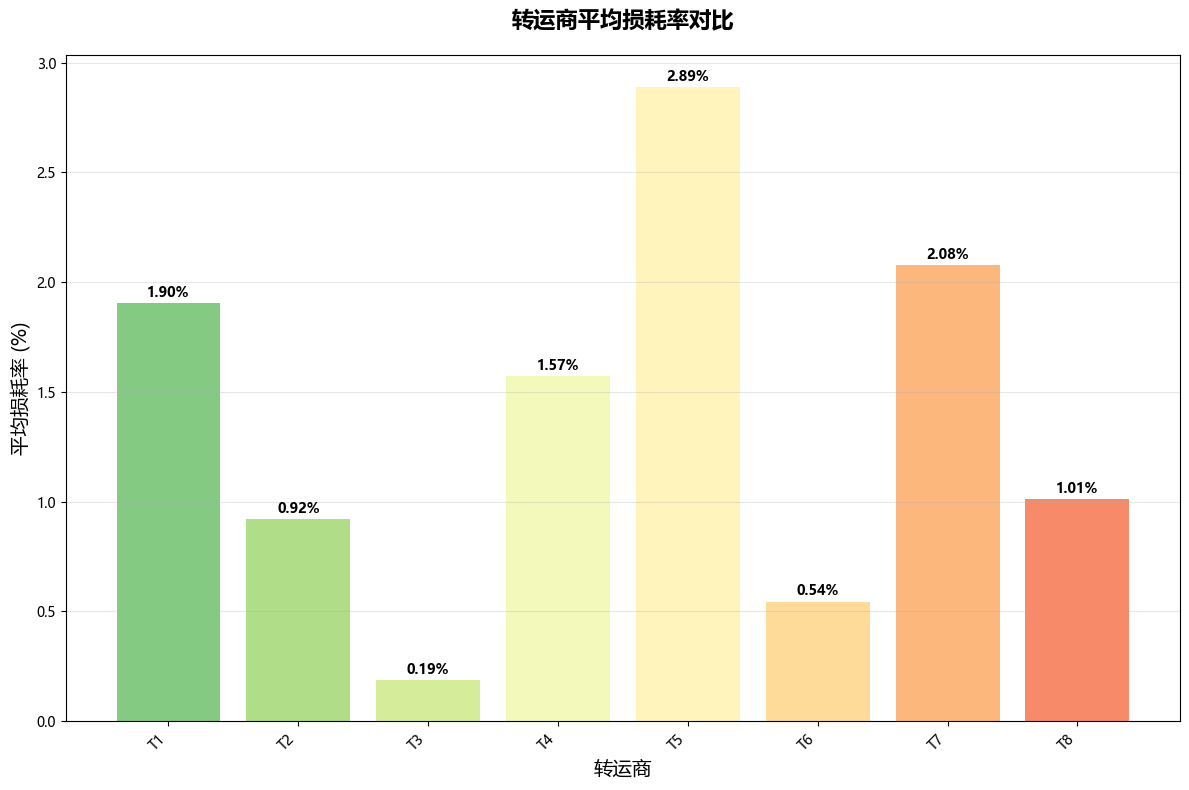

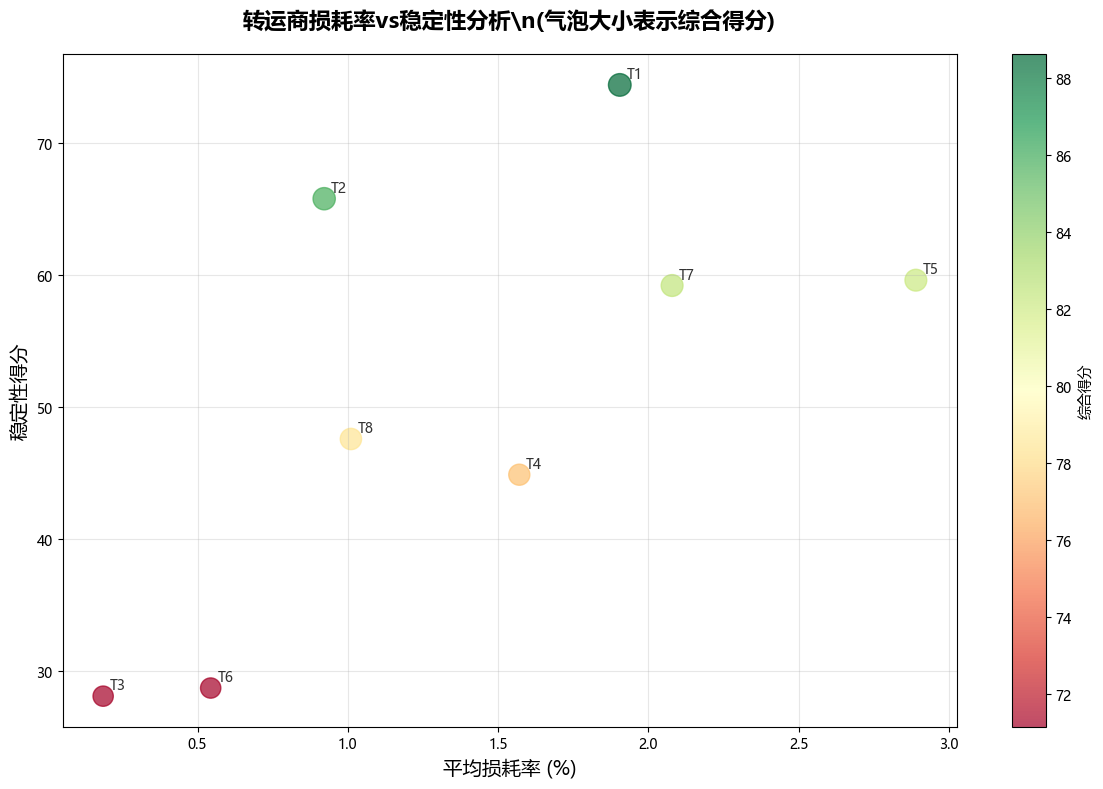

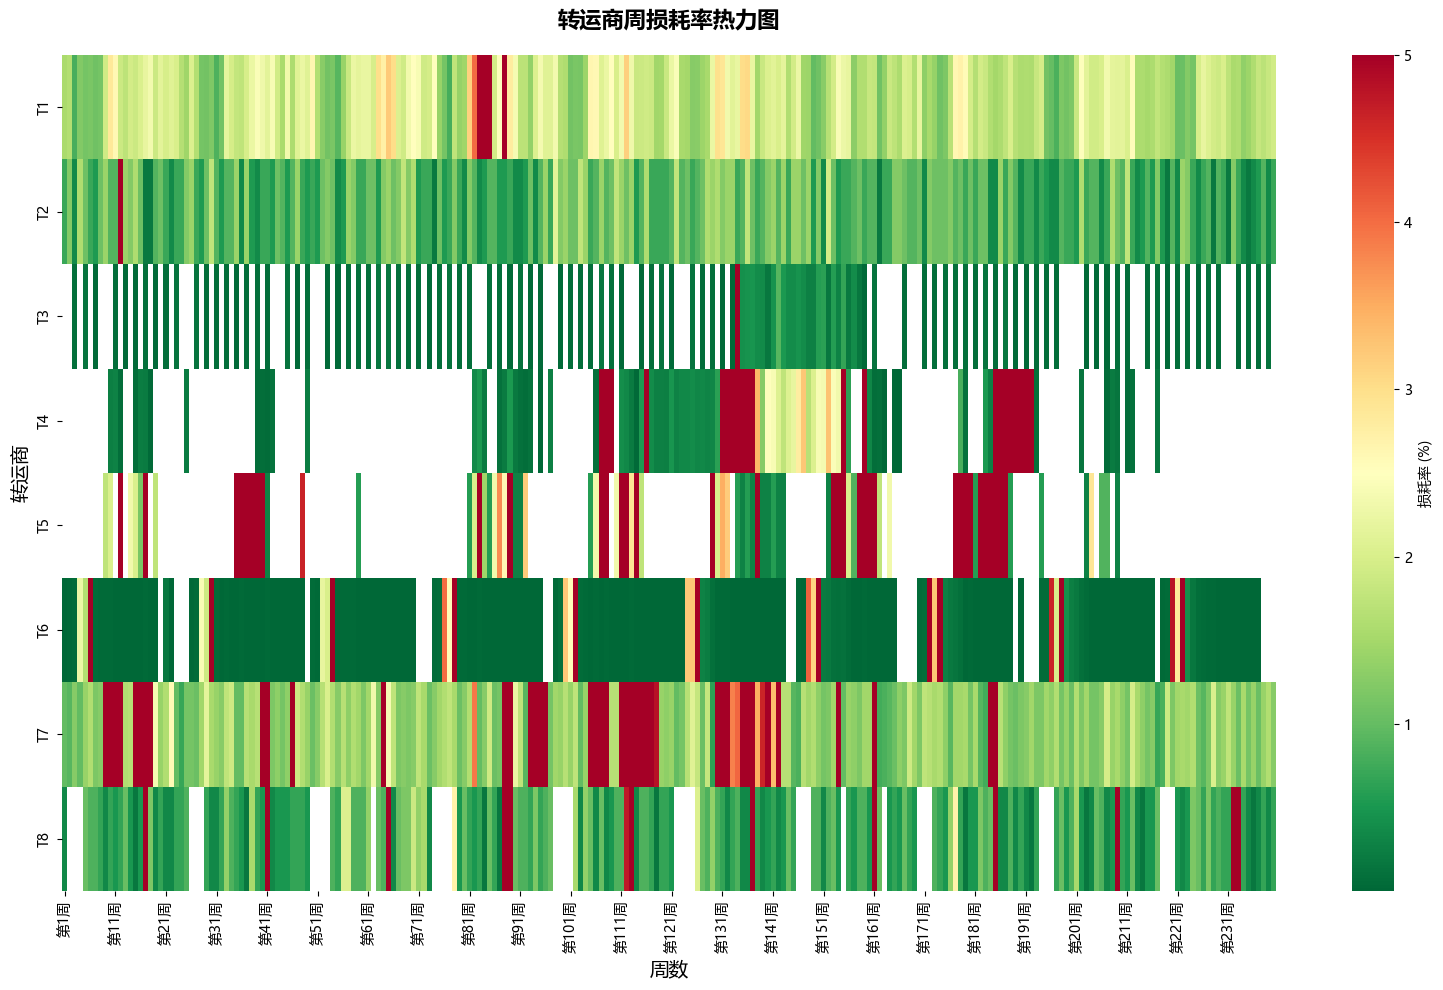

\nT1 平稳性检验结果:
ADF统计量: -3.153613
p值: 0.022832
临界值:
  1%: -3.459752
  5%: -2.874473
  10%: -2.573663
是否平稳: 是


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT1 ARIMA模型结果:
最优参数: ARIMA(1, 0, 2)
AIC: -161.1636
MAE: 0.1212
RMSE: 0.1760
预测未来24周的平均损耗率: 1.633%
\nT2 平稳性检验结果:
ADF统计量: -2.146810
p值: 0.226113
临界值:
  1%: -3.459885
  5%: -2.874531
  10%: -2.573694
是否平稳: 否


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT2 ARIMA模型结果:
最优参数: ARIMA(3, 0, 2)
AIC: -185.2173
MAE: 0.1160
RMSE: 0.1629
预测未来24周的平均损耗率: 0.848%
\nT3 平稳性检验结果:
ADF统计量: -2.457679
p值: 0.126114
临界值:
  1%: -3.459490
  5%: -2.874358
  10%: -2.573602
是否平稳: 否


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT3 ARIMA模型结果:
最优参数: ARIMA(1, 0, 3)
AIC: -363.3218
MAE: 0.0241
RMSE: 0.1092
预测未来24周的平均损耗率: 0.102%
\nT4 平稳性检验结果:
ADF统计量: -3.006975
p值: 0.034248
临界值:
  1%: -3.459620
  5%: -2.874415
  10%: -2.573632
是否平稳: 是


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


\nT4 ARIMA模型结果:
最优参数: ARIMA(2, 0, 2)
AIC: 128.3341
MAE: 0.1510
RMSE: 0.3052
预测未来24周的平均损耗率: 0.609%
\nT5 平稳性检验结果:
ADF统计量: -2.249161
p值: 0.188889
临界值:
  1%: -3.459752
  5%: -2.874473
  10%: -2.573663
是否平稳: 否


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT5 ARIMA模型结果:
最优参数: ARIMA(1, 1, 3)
AIC: 279.4235
MAE: 0.2902
RMSE: 0.4303
预测未来24周的平均损耗率: 0.657%
\nT6 平稳性检验结果:
ADF统计量: -8.104945
p值: 0.000000
临界值:
  1%: -3.459885
  5%: -2.874531
  10%: -2.573694
是否平稳: 是


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT6 ARIMA模型结果:
最优参数: ARIMA(3, 0, 2)
AIC: 190.3840
MAE: 0.2210
RMSE: 0.3518
预测未来24周的平均损耗率: 0.454%
\nT7 平稳性检验结果:
ADF统计量: -1.997407
p值: 0.287711
临界值:
  1%: -3.459885
  5%: -2.874531
  10%: -2.573694
是否平稳: 否


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT7 ARIMA模型结果:
最优参数: ARIMA(1, 1, 3)
AIC: 238.7601
MAE: 0.2745
RMSE: 0.3930
预测未来24周的平均损耗率: 1.197%
\nT8 平稳性检验结果:
ADF统计量: -4.556506
p值: 0.000155
临界值:
  1%: -3.459490
  5%: -2.874358
  10%: -2.573602
是否平稳: 是


d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\source\PyProjects\21ASolution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


\nT8 ARIMA模型结果:
最优参数: ARIMA(2, 0, 3)
AIC: 166.5411
MAE: 0.2022
RMSE: 0.3327
预测未来24周的平均损耗率: 0.948%


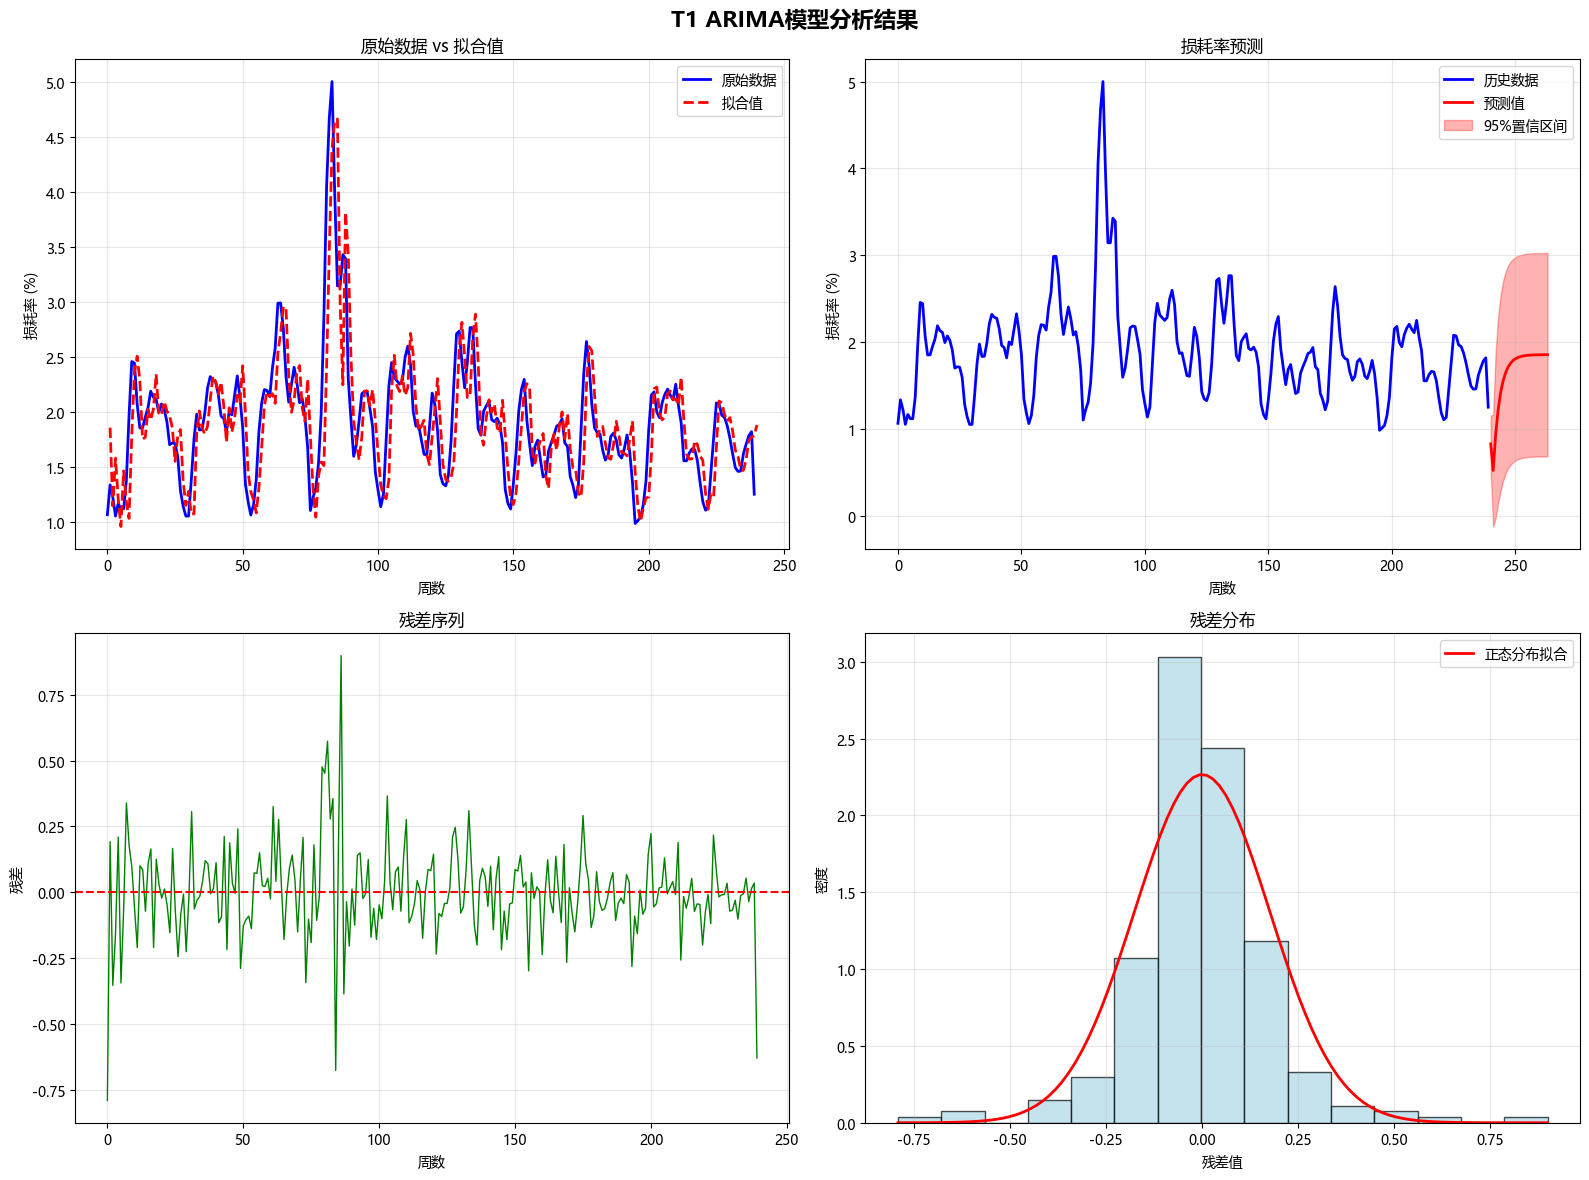

\nT1 ARIMA模型评估:
模型参数: ARIMA(1, 0, 2)
AIC: -161.1636
BIC: -143.7604
MAE: 0.1212
RMSE: 0.1760
残差均值: 0.000485
残差标准差: 0.1760


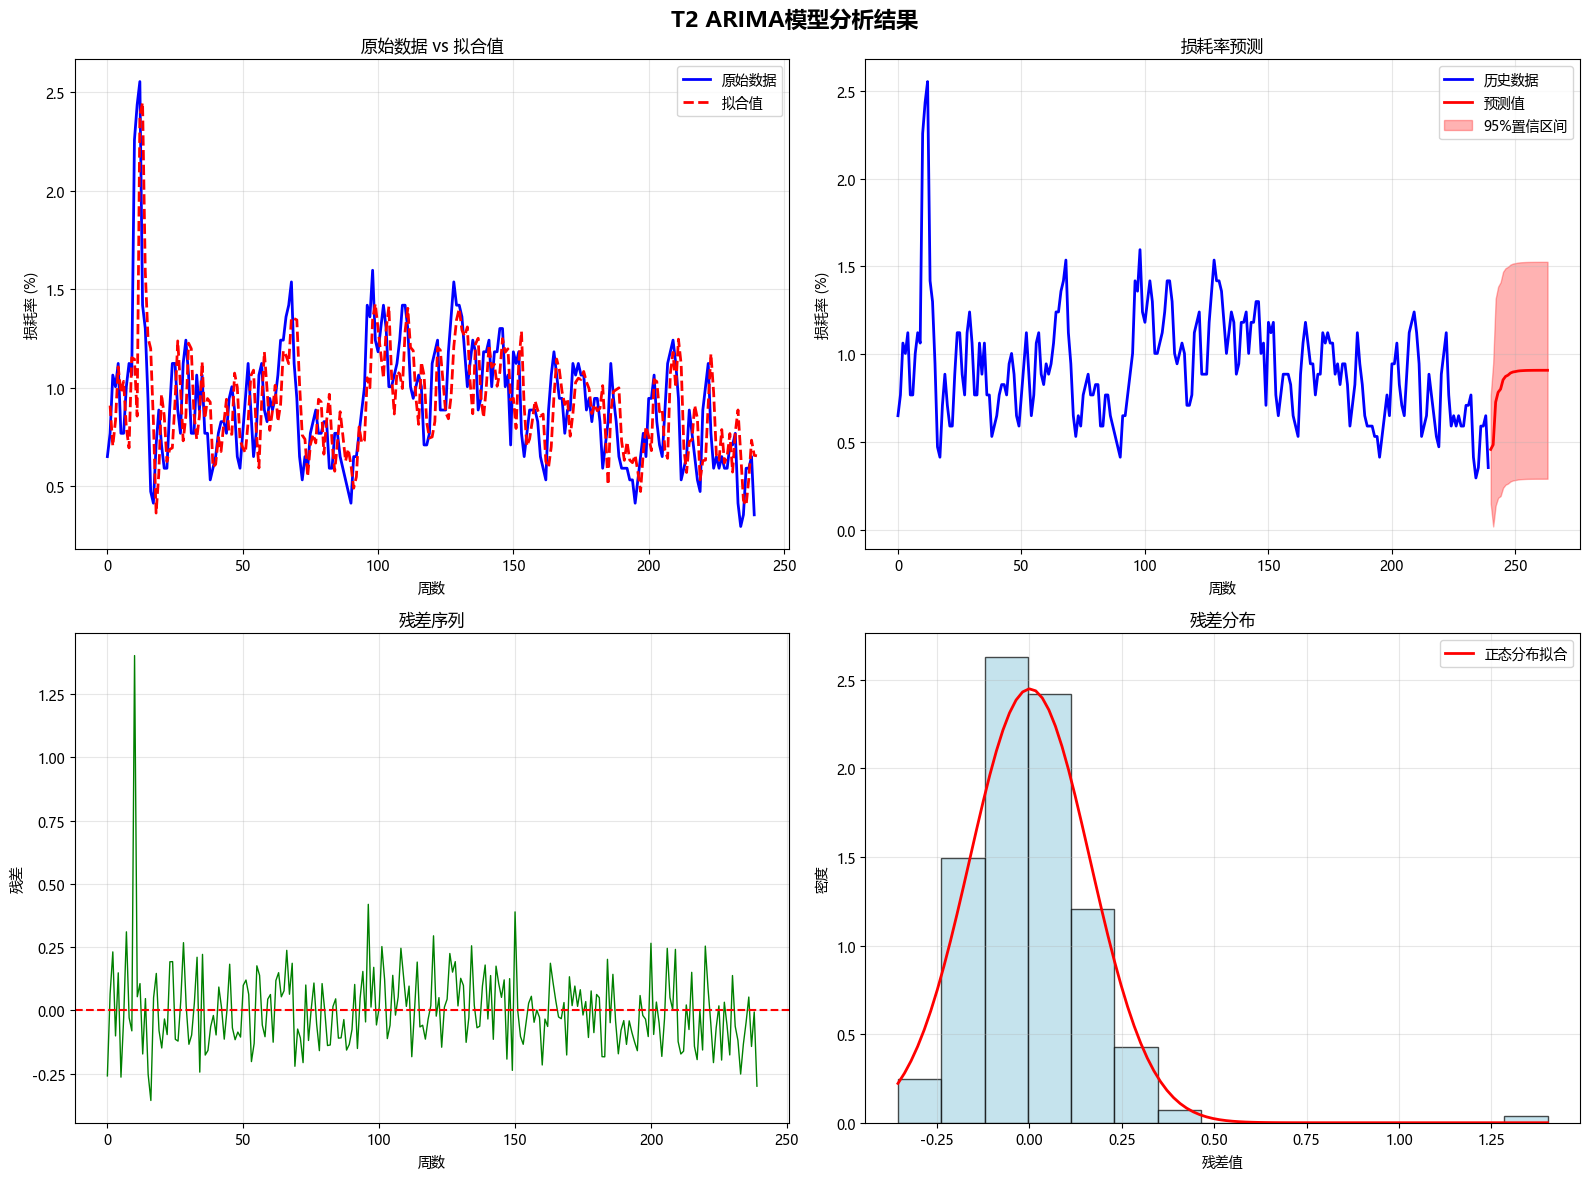

\nT2 ARIMA模型评估:
模型参数: ARIMA(3, 0, 2)
AIC: -185.2173
BIC: -160.8528
MAE: 0.1160
RMSE: 0.1629
残差均值: 0.001053
残差标准差: 0.1629


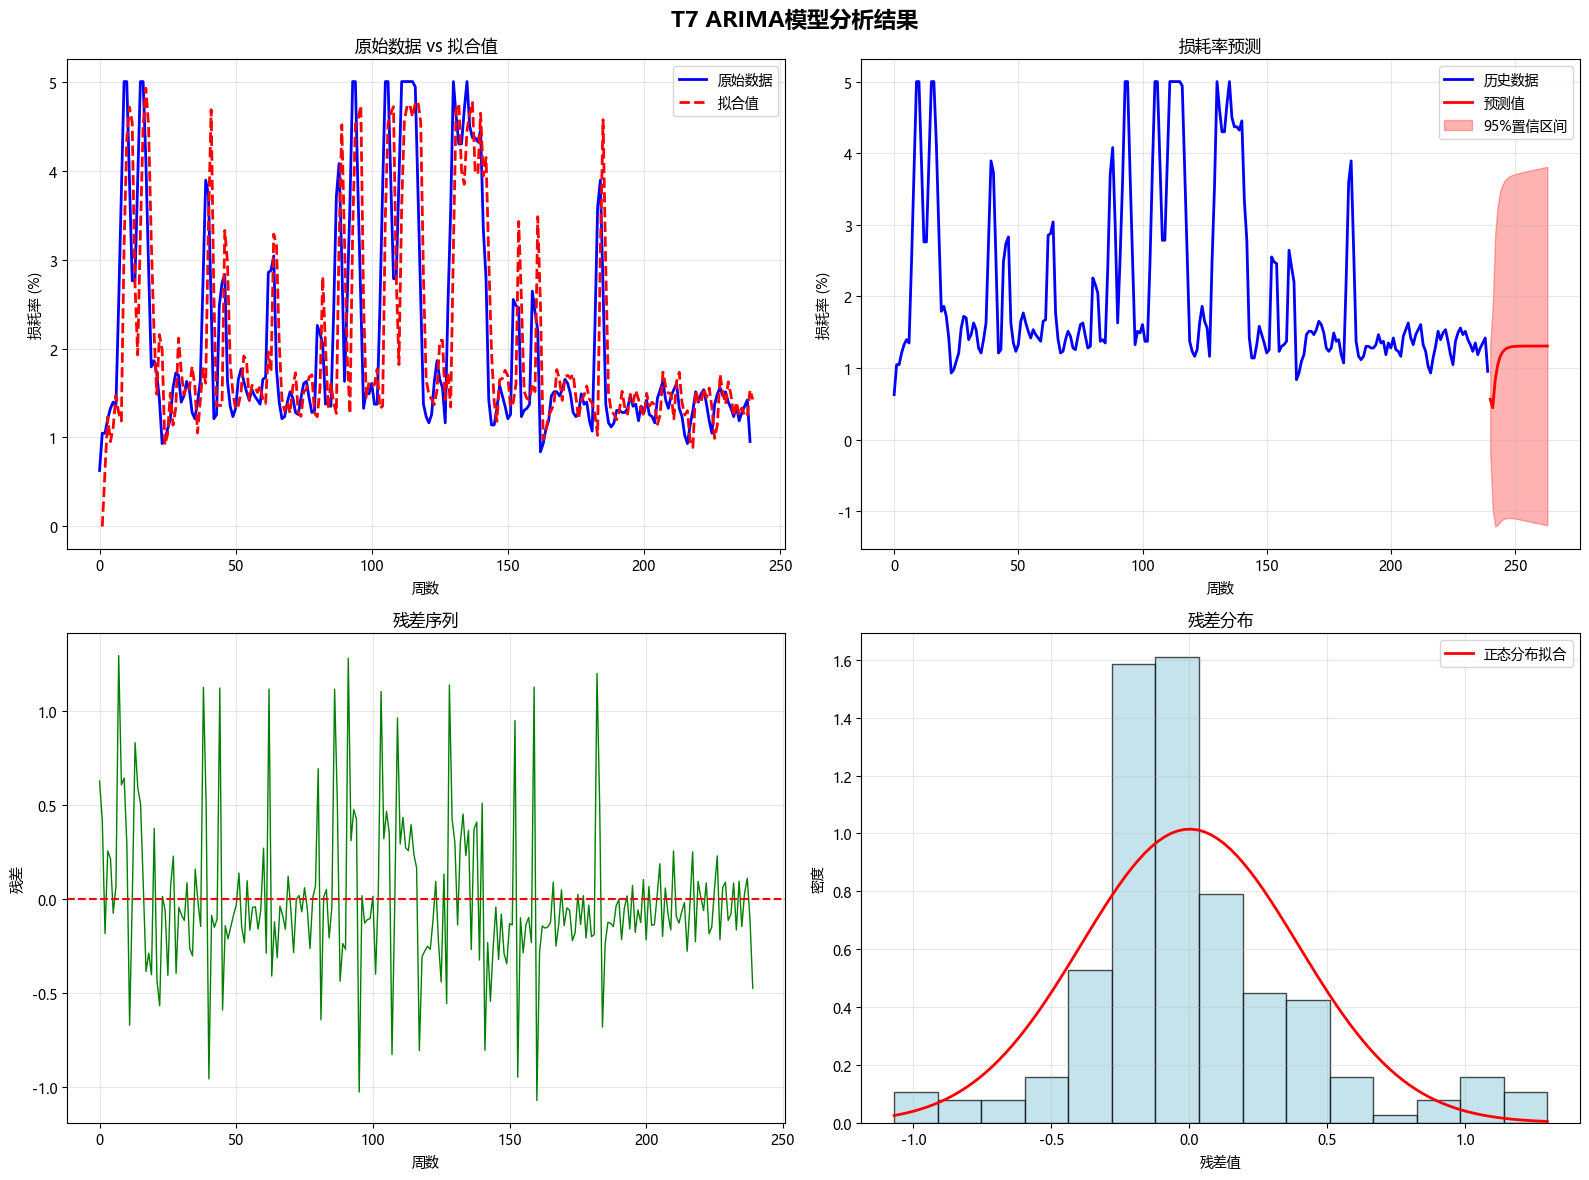

\nT7 ARIMA模型评估:
模型参数: ARIMA(1, 1, 3)
AIC: 238.7601
BIC: 256.1424
MAE: 0.2745
RMSE: 0.3930
残差均值: 0.000776
残差标准差: 0.3930
\n============================================================
转运商累计运力分析
\n1. 按预测损耗率排序的累计分析:
\n转运商累计运力分析表格 (排序依据: 预测损耗率（升序）)
前N家    转运商组合                               总运力        有效运力       损耗率期望      有效率      综合得分     稳定性     
1      T3                                  6,000      5,994      0.102     % 99.9%    71.1     28.1    
2      T3, T6                              12,000     11,967     0.278     % 99.7%    71.2     28.4    
3      T3, T6, T4                          18,000     17,930     0.389     % 99.6%    73.1     33.9    
4      T3, T6, T4, T5                      24,000     23,891     0.456     % 99.5%    75.4     40.3    
5      T3, T6, T4, T5, T2                  30,000     29,840     0.534     % 99.5%    77.4     45.4    
6      T3, T6, T4, T5, T2, T8              36,000     35,783     0.603     % 99.4%    77.6     45.8    
7      T3, T6, T4, T5, T2, T8

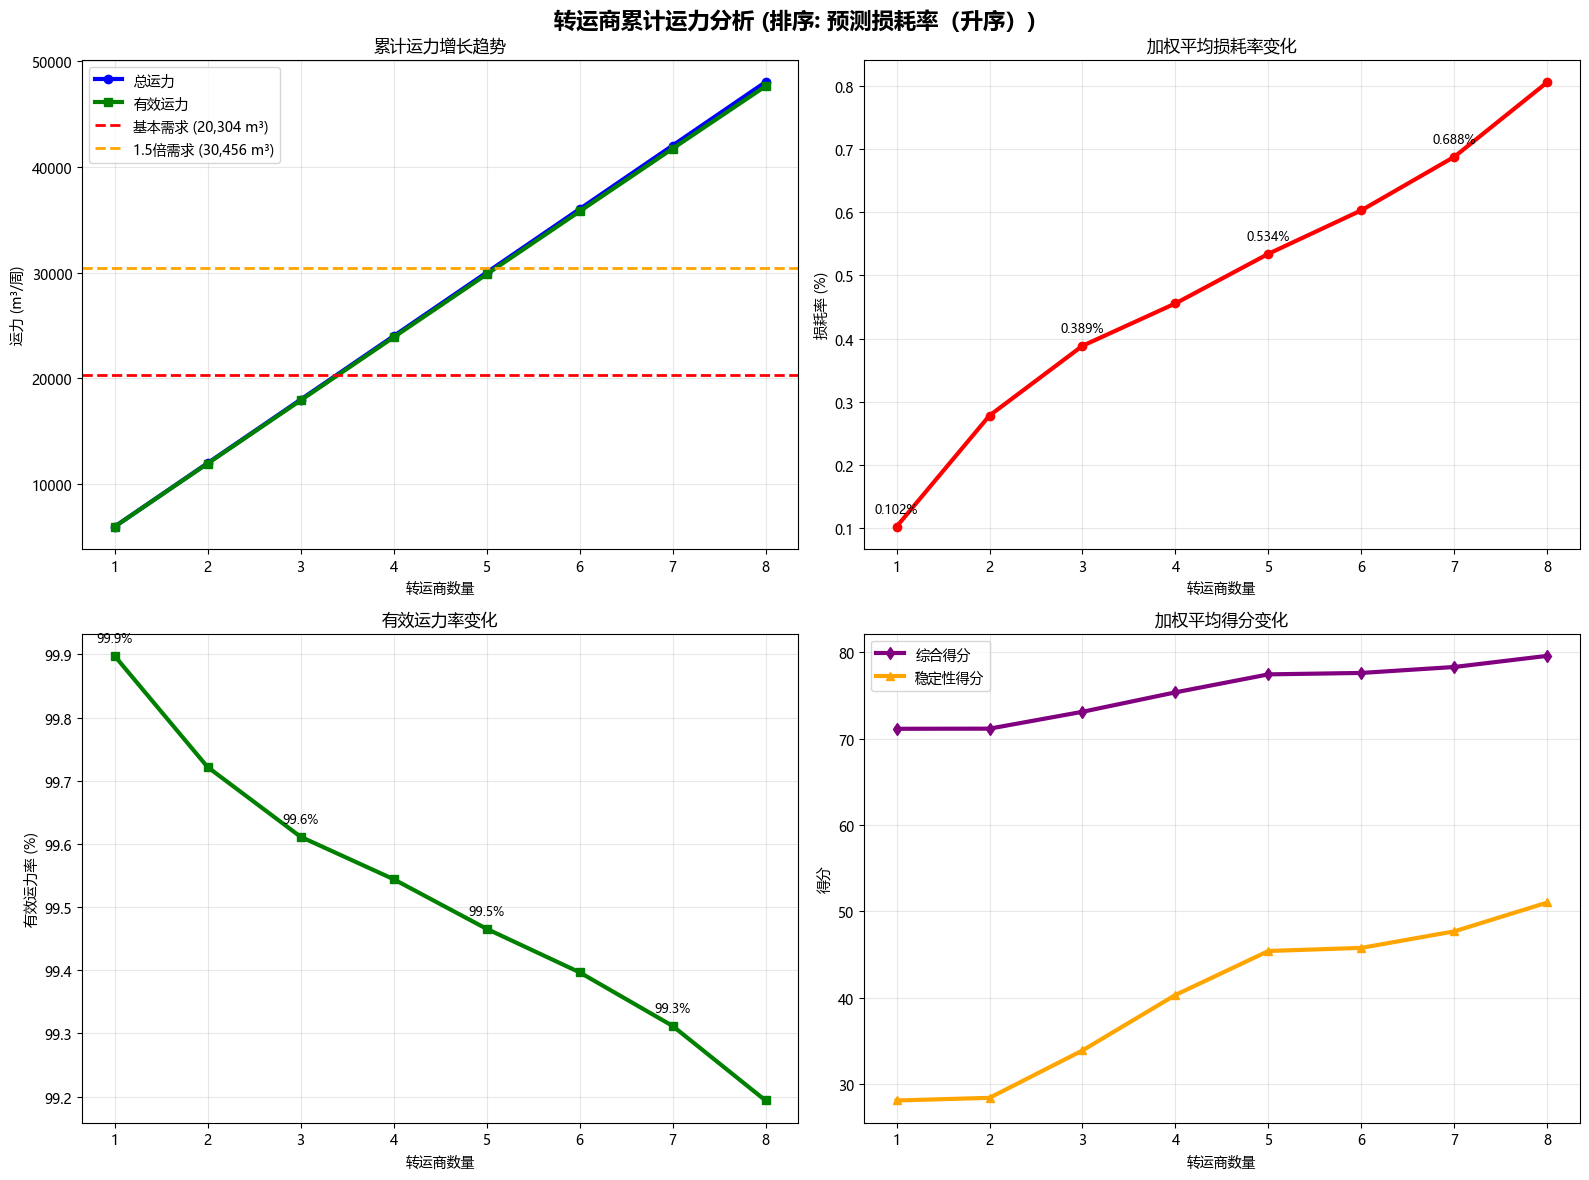

\n2. 按综合得分排序的累计分析:
\n转运商累计运力分析表格 (排序依据: 综合得分（降序）)
前N家    转运商组合                               总运力        有效运力       损耗率期望      有效率      综合得分     稳定性     
1      T1                                  6,000      5,902      1.633     % 98.4%    88.6     74.4    
2      T1, T2                              12,000     11,851     1.241     % 98.8%    87.2     70.1    
3      T1, T2, T7                          18,000     17,779     1.226     % 98.8%    85.6     66.5    
4      T1, T2, T7, T5                      24,000     23,740     1.084     % 98.9%    84.7     64.7    
5      T1, T2, T7, T5, T8                  30,000     29,683     1.056     % 98.9%    83.5     61.3    
6      T1, T2, T7, T5, T8, T4              36,000     35,646     0.982     % 99.0%    82.4     58.6    
7      T1, T2, T7, T5, T8, T4, T6          42,000     41,619     0.907     % 99.1%    80.8     54.3    
8      T1, T2, T7, T5, T8, T4, T6, T3      48,000     47,613     0.806     % 99.2%    79.6     51.0    
\n运力配置建议:
-----

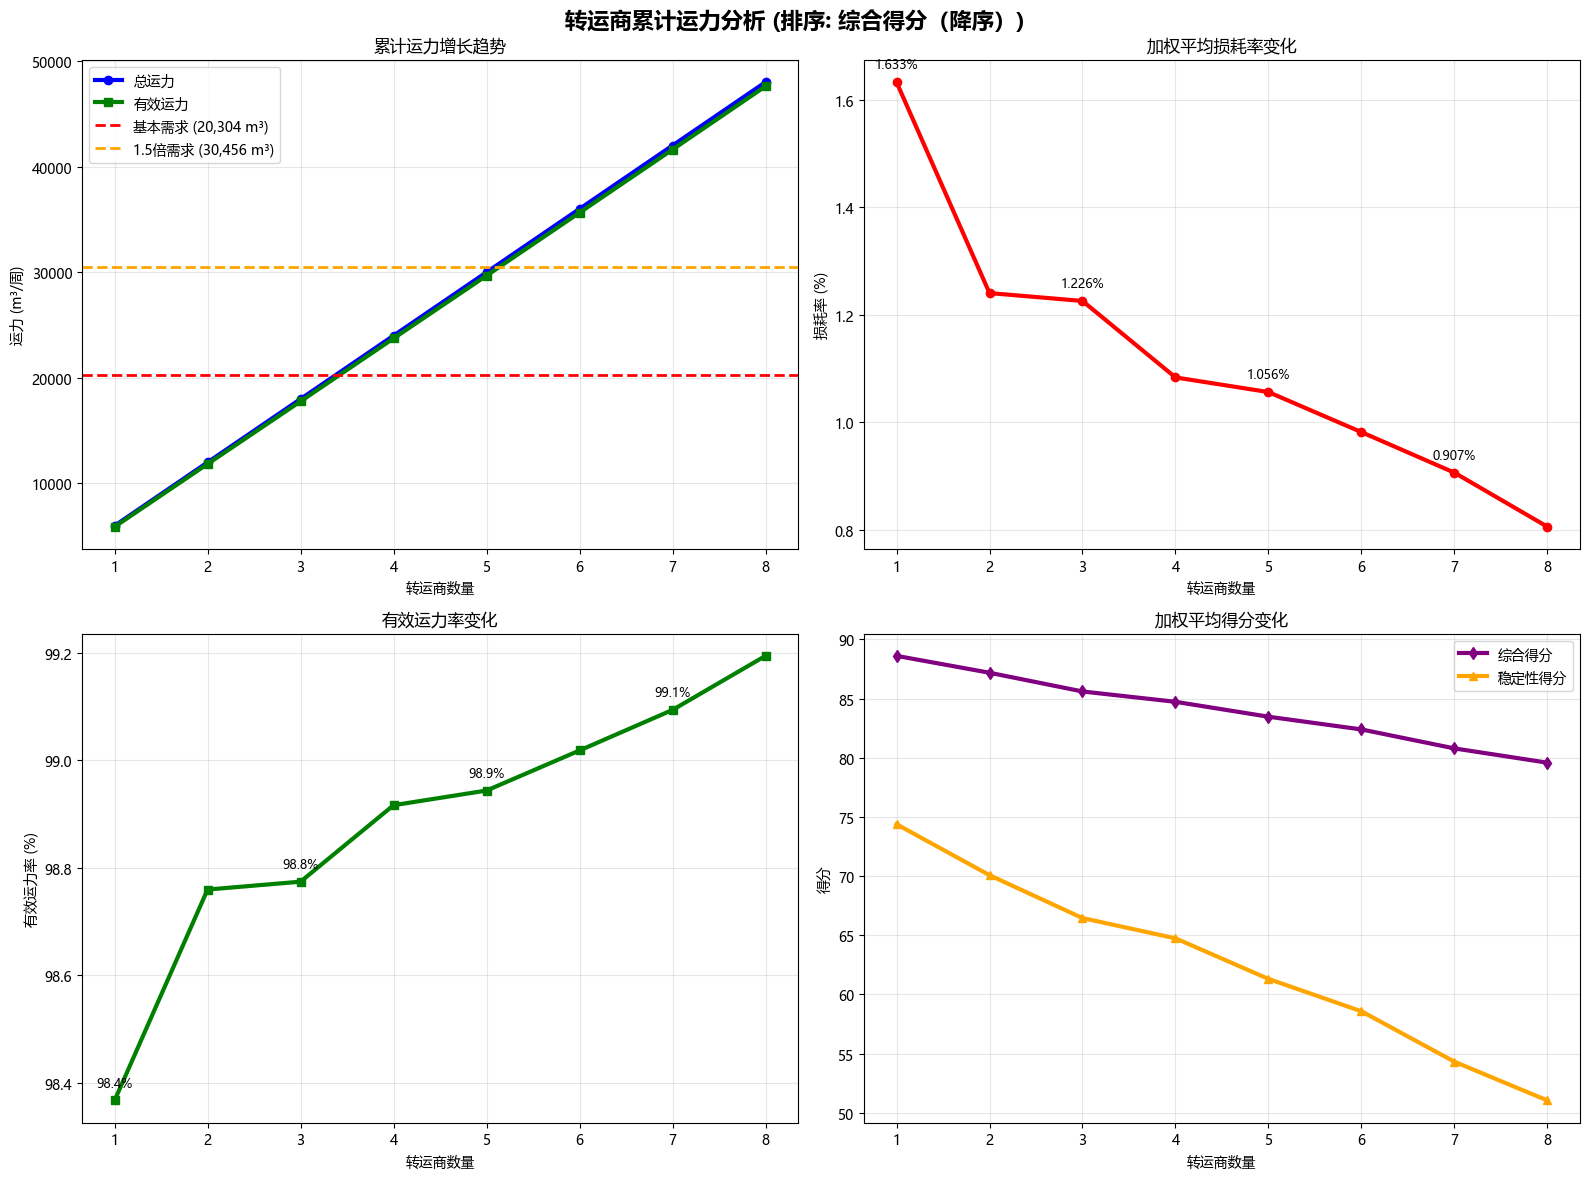

\n3. 按稳定性得分排序的累计分析:
\n转运商累计运力分析表格 (排序依据: 稳定性得分（降序）)
前N家    转运商组合                               总运力        有效运力       损耗率期望      有效率      综合得分     稳定性     
1      T1                                  6,000      5,902      1.633     % 98.4%    88.6     74.4    
2      T1, T2                              12,000     11,851     1.241     % 98.8%    87.2     70.1    
3      T1, T2, T5                          18,000     17,812     1.046     % 99.0%    85.5     66.6    
4      T1, T2, T5, T7                      24,000     23,740     1.084     % 98.9%    84.7     64.7    
5      T1, T2, T5, T7, T8                  30,000     29,683     1.056     % 98.9%    83.5     61.3    
6      T1, T2, T5, T7, T8, T4              36,000     35,646     0.982     % 99.0%    82.4     58.6    
7      T1, T2, T5, T7, T8, T4, T6          42,000     41,619     0.907     % 99.1%    80.8     54.3    
8      T1, T2, T5, T7, T8, T4, T6, T3      48,000     47,613     0.806     % 99.2%    79.6     51.0    
\n运力配置建议:
---

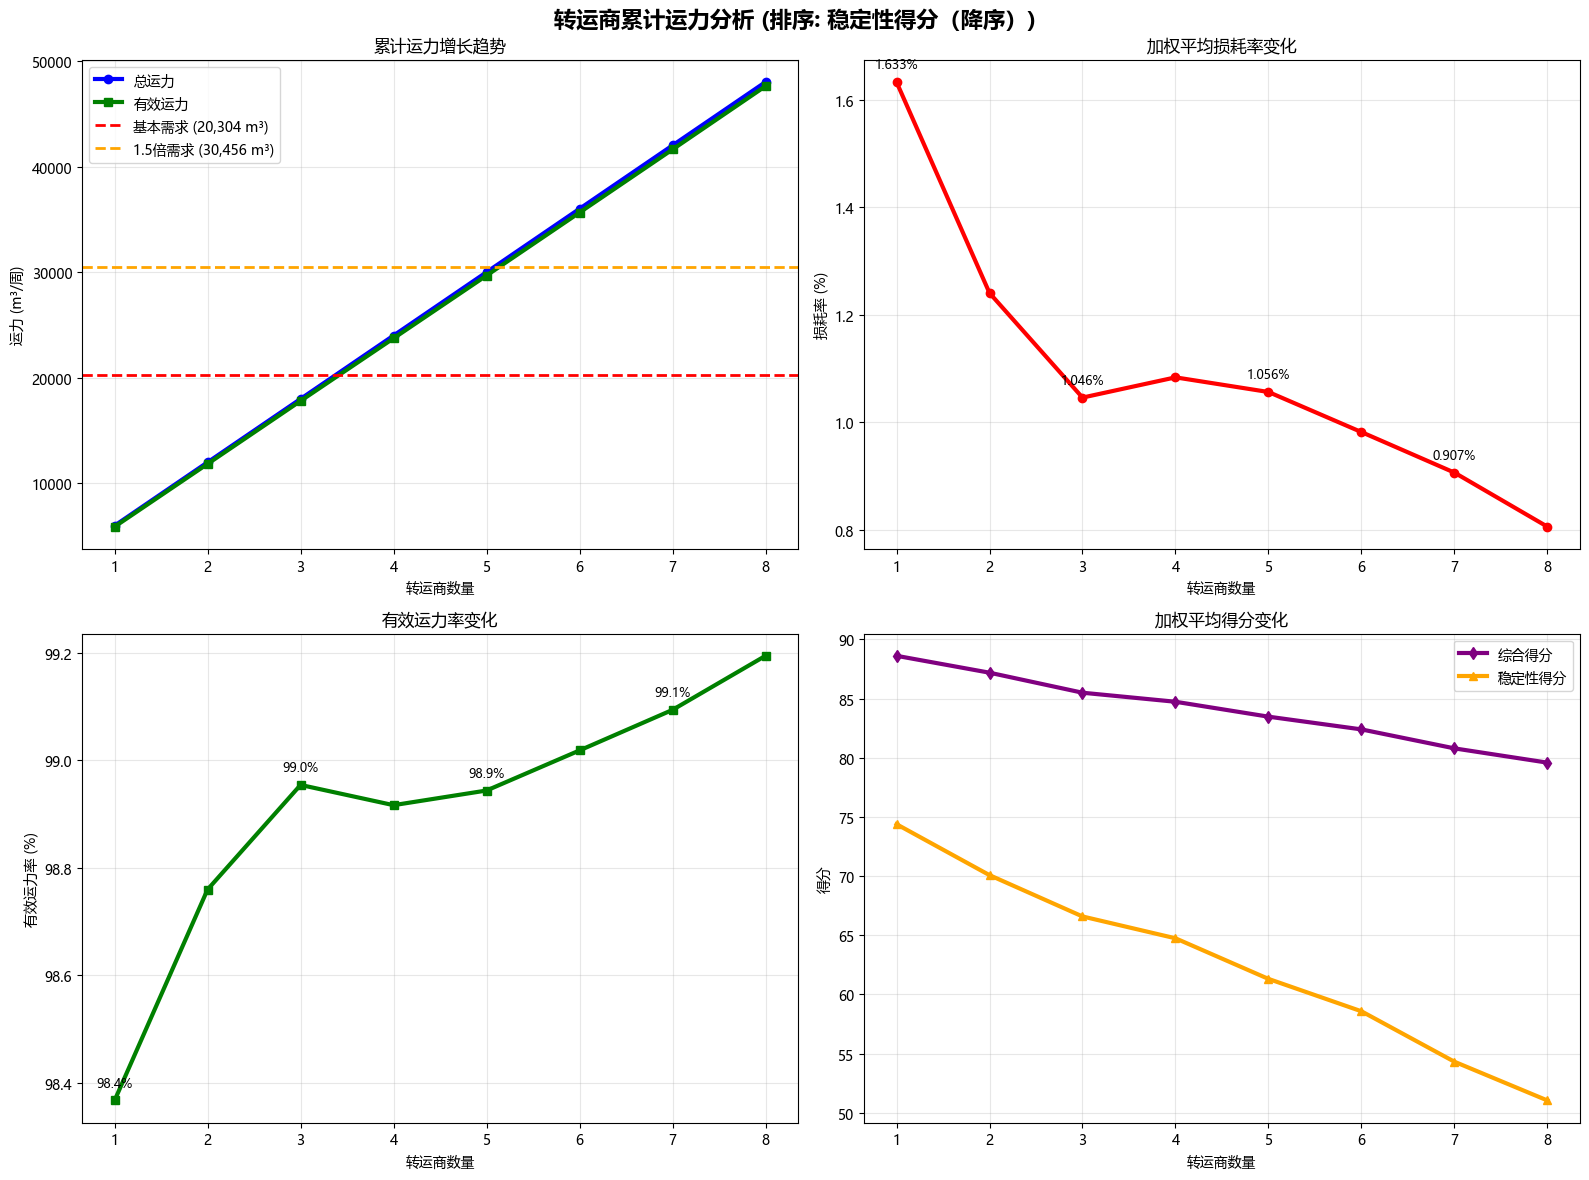

\n============================================================
转运商组合选择优化分析
\nC类材料单周转运需求分析:
每周产能需求: 28,200 m³
C类材料转换系数: 0.72
每周C类材料需求: 20,304 m³
转运商单周运力限制: 6,000 m³/周
理论最少需要转运商数量: 4 家
\n转运商组合优化结果 (min_loss算法):
最优转运商组合: T3, T4, T5, T6
组合转运商数量: 4 家
总运力: 24,000 m³/周
有效运力: 23,891 m³/周
加权平均损耗率: 0.456%
运力效率: 1.18
运力利用率: 85.0%
\n详细分配方案:
--------------------------------------------------------------------------------
转运商      运输量(m³)      接收量(m³)      损耗量(m³)      损耗率(%)     运力利用率     
--------------------------------------------------------------------------------
T3       5099         5094         5            0.102      85.0%     
T4       5099         5068         31           0.609      85.0%     
T5       5099         5066         34           0.657      85.0%     
T6       5099         5076         23           0.454      85.0%     
--------------------------------------------------------------------------------
合计       20397        20304        93           0.456      --        
\n方案评估

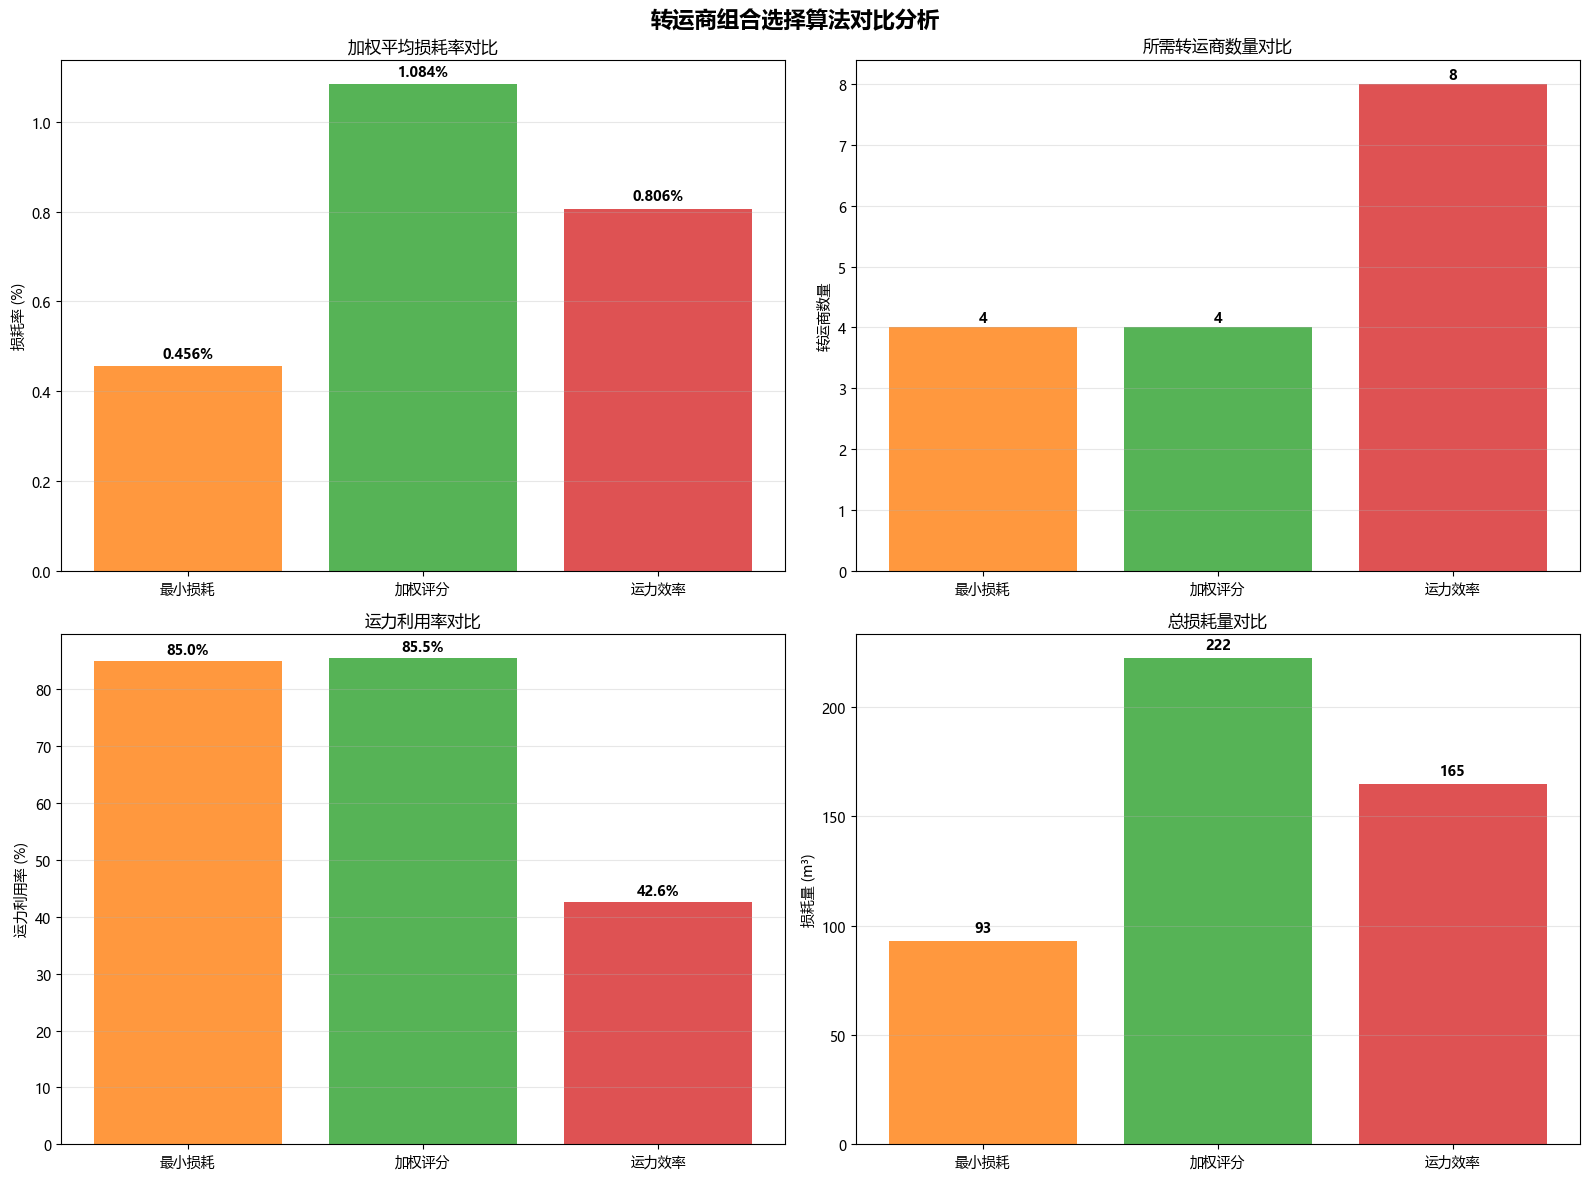

\n分析结果已保存至: DataFrames/转运商损耗率分析结果.xlsx
\n转运商损耗率分析完成！


In [1]:
from unittest import result
from transporter_loss_analysis import main as transporter_main
# 执行转运商损耗率分析
result_transporter = transporter_main()